### Import Libraries

In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

### Load and Inspect dataset

In [30]:
bc=load_breast_cancer()
X=bc.data
y=bc.target
X=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print(X.shape)
print(y.shape)
print(bc.feature_names)
print(bc.target_names)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


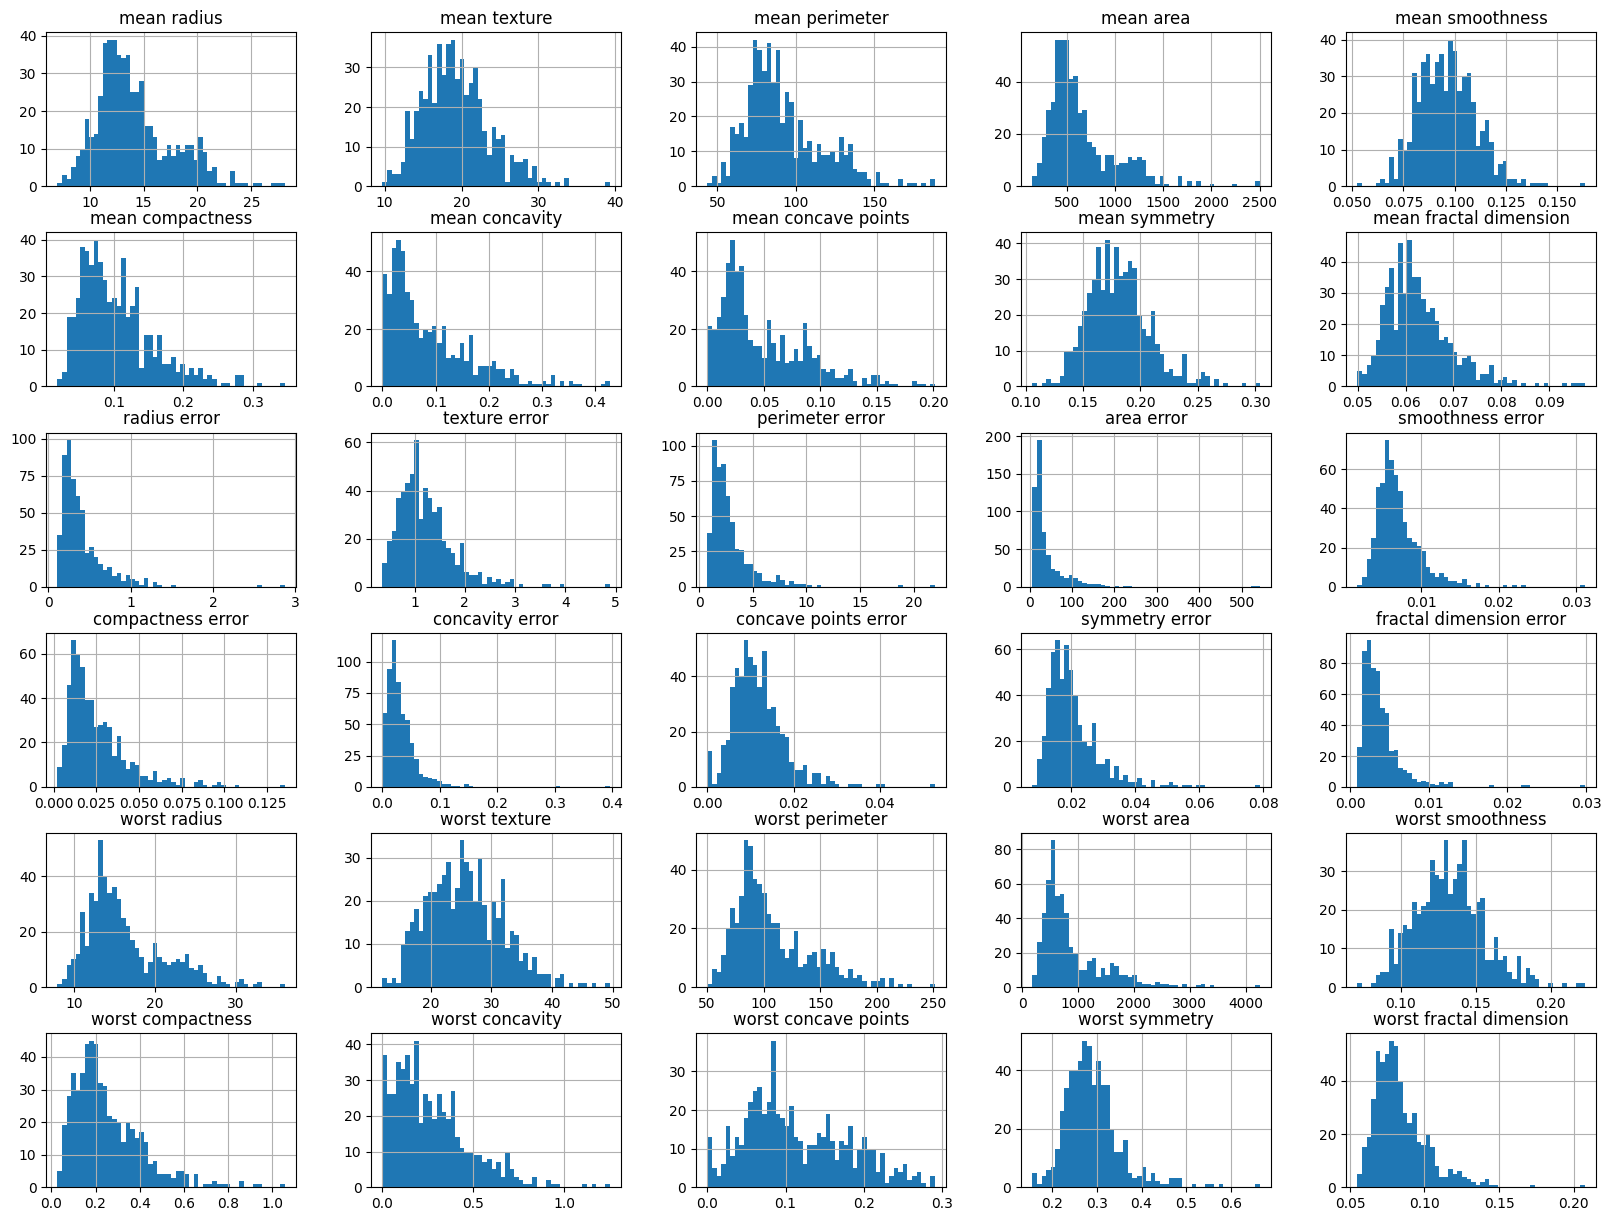

In [23]:
X_vis=pd.DataFrame(X,columns=bc.feature_names)
X_vis.head()
X_vis.hist(bins=50,figsize=(20,15))
plt.show()

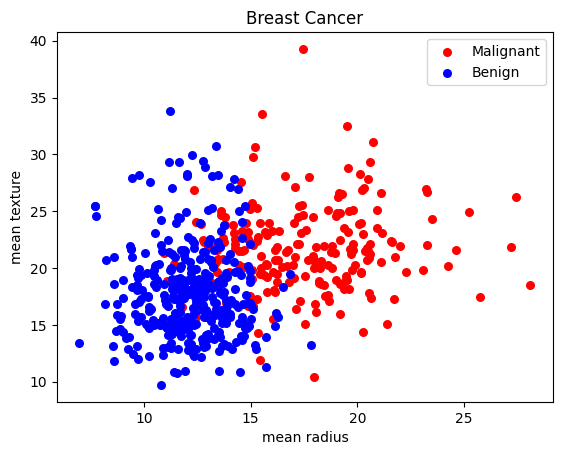

In [28]:
plt.scatter(X_vis[y==0]['mean radius'],X_vis[y==0]['mean texture'],c='red',label='Malignant',s=30)
plt.scatter(X_vis[y==1]['mean radius'],X_vis[y==1]['mean texture'],c='blue',label='Benign',s=30)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Breast Cancer")
plt.legend()
plt.show()

### Gaussian Discriminant Analysis Model

In [37]:
class GDA:
  def fit(self,X,y):
    n_samples,n_features=X.shape

    #estimate phi
    self.phi=np.mean(y)

    # estimate means

    X0=X[y==0]
    X1=X[y==1]

    self.mu0=np.mean(X0,axis=0)
    self.mu1=np.mean(X1,axis=0)

    Sigma=np.zeros((n_features,n_features))

    for i in range(n_samples):
      x_i=X[i].reshape(-1,1)
      mu=self.mu1 if y[i]==1 else self.mu0
      mu=mu.reshape(-1,1)
      diff=x_i-mu
      Sigma+=diff@diff.T
    self.Sigma=Sigma/n_samples
    self.Sigma_inv=np.linalg.inv(self.Sigma)

  def predict(self,X):


    def log_gaussian_pdf(x,mu):
      diff= x-mu
      return -0.5*diff.T@self.Sigma_inv@diff
    y_pred=[]
    for x in X:
      x=x.reshape(-1,1)
      log_p0=log_gaussian_pdf(x,self.mu0.reshape(-1,1))+np.log(1-self.phi)
      log_p1=log_gaussian_pdf(x,self.mu1.reshape(-1,1))+np.log(self.phi)
      y_pred.append(1 if log_p1>log_p0 else 0)
    return np.array(y_pred)




### Predict

In [51]:
model=GDA()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

### Results

Accuracy:95.61%
              precision    recall  f1-score   support

   Malignant       0.97      0.91      0.94        43
      Benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



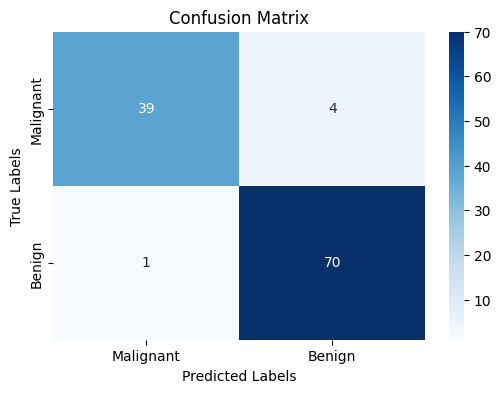

In [52]:
accuracy=np.mean(predictions==y_test)
print(f"Accuracy:{100*accuracy:.2f}%")

print(classification_report(y_test,predictions,target_names=['Malignant','Benign']))
cm=confusion_matrix(y_test,predictions)
class_names=['Malignant','Benign']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


myst